# **About Company** 

A high-tech company that manufactures health-focused smart products.Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quicklypositioned itself as a tech-driven wellness company for women.

# Ask

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

# Pepare

For this analysis I will use FitBit Fitness Tracker Data. I will focus on activity, sleep, and stress.

In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
dailyActivity_merged <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailyActivity_merged <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "fitbit"

In [2]:
daily_activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
sleep_day <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_info <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


# **Process**

Identifying how data is organized 

In [3]:
head(daily_activity)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [4]:
head(daily_calories)

,Id,ActivityDay,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


In [5]:
str(daily_activity)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

I'm interesed in the following varaibles: ActivityDate, TotalSteps, TotalDistance, Calories, VeryActiveDistance, ModeratelyActiveDistance,LightActiveDistance.

In [6]:
trimmed_df <- daily_activity %>% 
  select(Id,ActivityDate, TotalSteps, TotalDistance, Calories, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance)

In [7]:
head(trimmed_df)

,Id,ActivityDate,TotalSteps,TotalDistance,Calories,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance
,<dbl>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,1503960366,4/12/2016,13162,8.50,1985,1.88,0.55,6.06
2,1503960366,4/13/2016,10735,6.97,1797,1.57,0.69,4.71
3,1503960366,4/14/2016,10460,6.74,1776,2.44,0.40,3.91
4,1503960366,4/15/2016,9762,6.28,1745,2.14,1.26,2.83
5,1503960366,4/16/2016,12669,8.16,1863,2.71,0.41,5.04
6,1503960366,4/17/2016,9705,6.48,1728,3.19,0.78,2.51


I need to check to see how many distinct Ids are within each dataset.

In [8]:
n_distinct(trimmed_df$Id)
n_distinct(daily_calories$Id)
n_distinct(weight_info$Id)
n_distinct(sleep_day$Id)

[1] 33

[1] 33

[1] 8

[1] 24

You will notice that the trimmed daily activites data set has 33 distinct Ids. The daily calories has 24 distinct Ids,the weight info has 24 distinct Ids and the sleep day dat set has 24 distinct Ids. The Ids have a large enough sample size.

Next let’s have a look at summary the data sets:

In [9]:
# activity
trimmed_df %>%  
  select(ActivityDate, TotalSteps,Calories, VeryActiveDistance,ModeratelyActiveDistance, LightActiveDistance) %>%
  summary()


# calories
daily_calories %>%
  select(ActivityDay,Calories) %>%
  summary()

# sleep
sleep_day %>%
  select(SleepDay,TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()

# weight
weight_info %>%
  select(WeightKg, BMI) %>%
  summary()

 ActivityDate         TotalSteps       Calories    VeryActiveDistance
 Length:940         Min.   :    0   Min.   :   0   Min.   : 0.000    
 Class :character   1st Qu.: 3790   1st Qu.:1828   1st Qu.: 0.000    
 Mode  :character   Median : 7406   Median :2134   Median : 0.210    
                    Mean   : 7638   Mean   :2304   Mean   : 1.503    
                    3rd Qu.:10727   3rd Qu.:2793   3rd Qu.: 2.053    
                    Max.   :36019   Max.   :4900   Max.   :21.920    
 ModeratelyActiveDistance LightActiveDistance
 Min.   :0.0000           Min.   : 0.000     
 1st Qu.:0.0000           1st Qu.: 1.945     
 Median :0.2400           Median : 3.365     
 Mean   :0.5675           Mean   : 3.341     
 3rd Qu.:0.8000           3rd Qu.: 4.782     
 Max.   :6.4800           Max.   :10.710     

 ActivityDay           Calories   
 Length:940         Min.   :   0  
 Class :character   1st Qu.:1828  
 Mode  :character   Median :2134  
                    Mean   :2304  
                    3rd Qu.:2793  
                    Max.   :4900  

   SleepDay         TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Length:413         Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 Class :character   1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Mode  :character   Median :1.000     Median :433.0      Median :463.0  
                    Mean   :1.119     Mean   :419.5      Mean   :458.6  
                    3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
                    Max.   :3.000     Max.   :796.0      Max.   :961.0  

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

**summary of analysis so far:**

The majority of the participants are moderately active.

The average participant sleeps 7 hours. It also looks like it takes the avaerage participant 30 mins to fall a sleep.

Average total steps per day are 7638 which is less than the recommendation by CDC research for general fitness with is 10 000 steps. 

**Merge data**

I will merge the trimmed daily activity data and the daily calories data. They share the same Id and calories columns, therefore it is easy to simply merge.

In [10]:
merged_data <- merge(daily_calories, trimmed_df, by=c('Id','Calories'))
head(merged_data)

,Id,Calories,ActivityDay,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance
,<dbl>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,0,5/12/2016,5/12/2016,0,0.00,0.00,0.00,0.00
2,1503960366,1728,4/17/2016,4/17/2016,9705,6.48,3.19,0.78,2.51
3,1503960366,1740,5/8/2016,5/8/2016,10060,6.58,3.53,0.32,2.73
4,1503960366,1745,4/15/2016,4/15/2016,9762,6.28,2.14,1.26,2.83
5,1503960366,1775,4/21/2016,4/21/2016,9819,6.34,1.34,0.35,4.65
6,1503960366,1776,4/14/2016,4/14/2016,10460,6.74,2.44,0.40,3.91


# Analyze

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



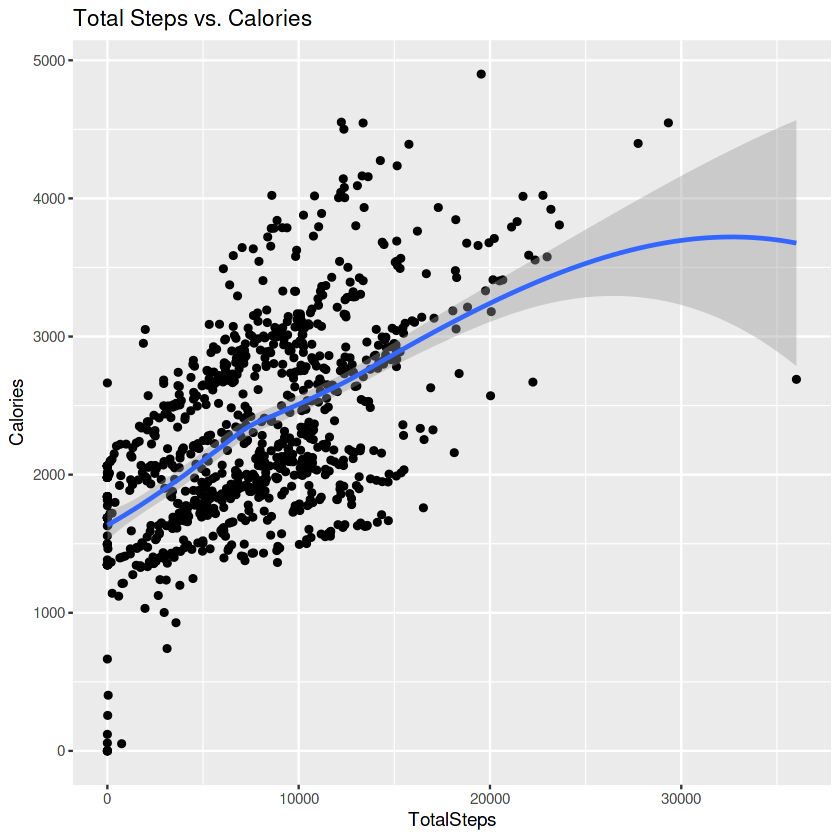

In [11]:
ggplot(data = trimmed_df)+ 
geom_point(mapping = aes(x = TotalSteps, y = Calories))+ 
geom_smooth(mapping = aes(x = TotalSteps, y = Calories))+
labs(title="Total Steps vs. Calories")

There is a positive correlation between the total steps and the amount of calories burned.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



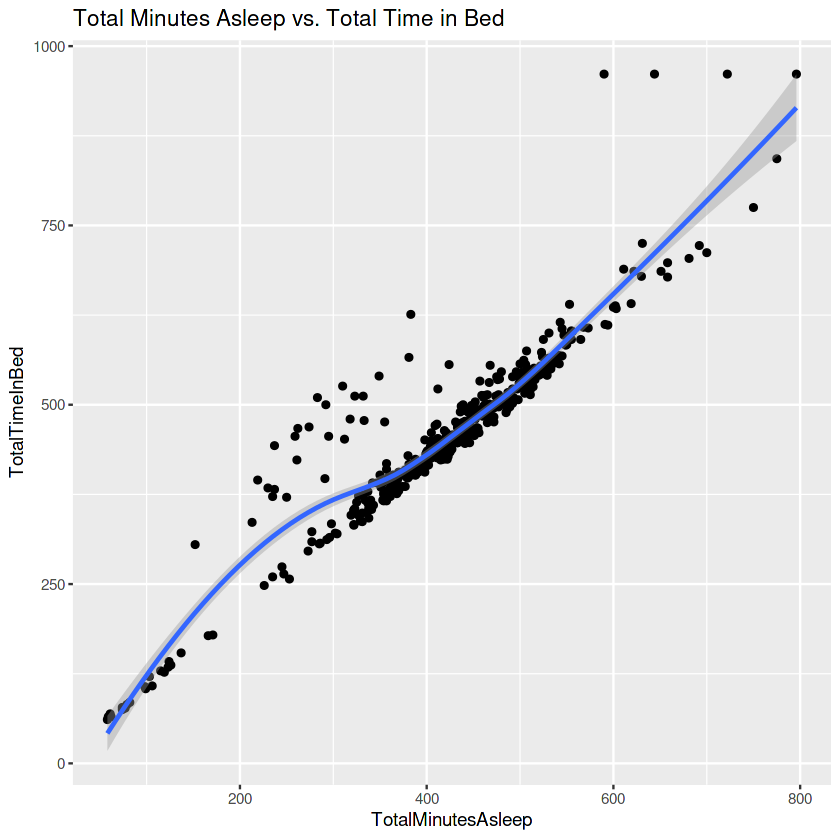

In [12]:
ggplot(data = sleep_day)+ 
geom_point(mapping = aes(x = TotalMinutesAsleep, y = TotalTimeInBed))+ 
geom_smooth(mapping = aes(x = TotalMinutesAsleep, y = TotalTimeInBed))+
labs(title="Total Minutes Asleep vs. Total Time in Bed")

The relationship between total mintutes a sleep and total time in bed is linear. However the total time in bed is greater than the total minutes a sleep.This should be taken into consideration when advising users on the correct time to sleep. Inorder to get a sufficient 7 to 8 hours of sleep as recommended by the CDC. We must take into consideration the total time in bed and the total time asleep.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



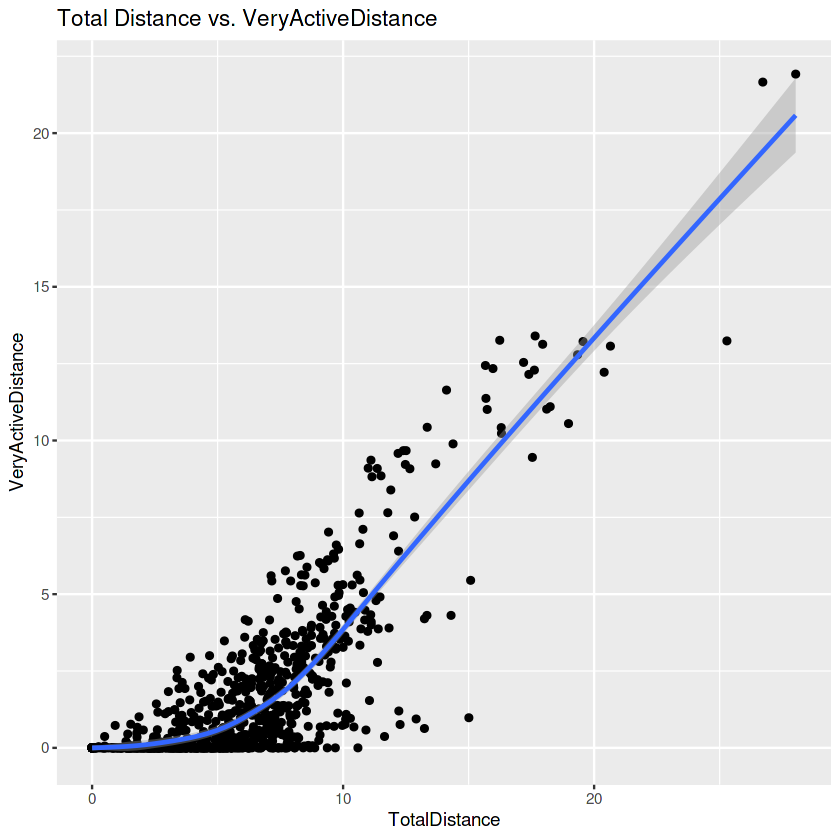

In [13]:
ggplot(data = merged_data)+ 
geom_point(mapping = aes(x = TotalDistance, y = VeryActiveDistance))+ 
geom_smooth(mapping = aes(x = TotalDistance, y = VeryActiveDistance))+
labs(title="Total Distance vs. VeryActiveDistance")

We can see from the data that users who generally run a greater distance, run at a more active pace for longer. Which makes sense considering that those who run a greater distance are generally more fit. However we will need to support our insights with more data as there are a number of factors that can impact this result.

# Summary and Recommendations

**Key Takeaways**:
* Majority of the users steps for the day are less than the recommened 10000 steps by CDC research.
* Very active users burn more calories.
* A lot of users do not get a sufficient 7 to 8 hours of sleep. 

**Recommendations**

* In order for users to lose weight, users will need to control there daily calorie consumption. The Bellabeat can help users monitor they calorie intake.
* In order to ensure users are getting sufficent sleep, Bellabeat should use app notifications to alert uses go to bed in time.
* Bellebeat can provide workout programs to follow to help users lose weight or to gain muscle.